Loading data: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.npy
Data loading successful: Number of pulses 3000
Image saved: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.png


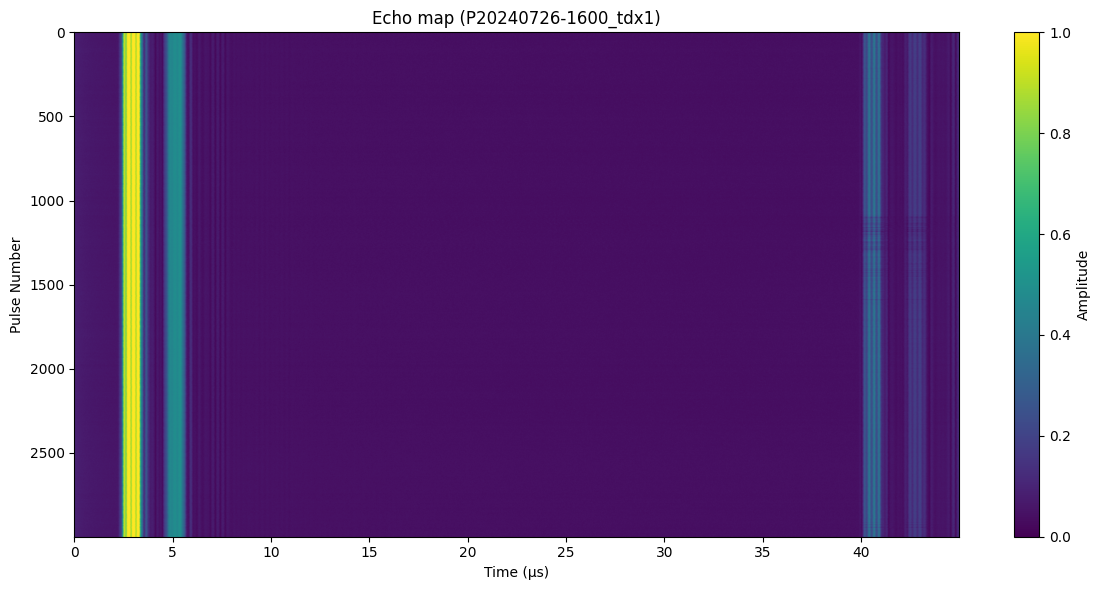

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_image_from_npy(npy_file_path, output_dir=None):
    """
    Function to load echo map data from .npy file and generate an image
    
    Parameters:
    -----------
    npy_file_path : str
        Path to .npy file
    output_dir : str
        Directory to save output image, if None, only display without saving
        
    Returns:
    --------
    None
    """
    # Load .npy file
    print(f"Loading data: {npy_file_path}")
    try:
        data = np.load(npy_file_path, allow_pickle=True).item()
        
        # Extract data
        hilbert_matrix_trimmed = data['hilbert_matrix']
        adjusted_time_us_trimmed = data['time_axis']
        n_pulses = data['n_pulses']
        
        print(f"Data loading successful: Number of pulses {n_pulses}")
        
        # Create plot
        plt.figure(figsize=(12, 6))
        if len(adjusted_time_us_trimmed) > 0:
            plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis', 
                    extent=[0, adjusted_time_us_trimmed[-1], n_pulses-0.5, -0.5],
                    vmin=0, vmax=1)
        else:
            # If time axis is empty, plot with default range
            plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis',
                    vmin=0, vmax=1)
        
        plt.colorbar(label='Amplitude')
        plt.xlabel('Time (μs)')
        plt.ylabel('Pulse Number')
        
        # Generate output filename from input filename
        base_filename = os.path.basename(npy_file_path)
        base_name = os.path.splitext(base_filename)[0]
        plt.title(f'Echo map ({base_name})')
        plt.tight_layout()
        
        # Save the image
        if output_dir is not None:
            # Create output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)
            
            # Generate output filename
            output_filename = f"{base_name}.png"
            output_path = os.path.join(output_dir, output_filename)
            
            # Save image
            plt.savefig(output_path)
            print(f"Image saved: {output_path}")
        
        plt.show()
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Jupyter環境ではargparseを使わず、直接パラメータを設定する
# Jupyter notebookでは引数解析が正しく動作しないため

# 例示用のファイルパス
example_file = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp\\P20240726-1600_tdx1.npy"
example_output = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"

# 使用するファイルパスと出力ディレクトリを直接指定
npy_file = example_file
output_dir = example_output

# 関数を呼び出して画像を生成・表示
generate_image_from_npy(npy_file, output_dir)

# コマンドライン引数を使用したい場合は、このノートブックをPythonスクリプトとして
# 保存し、コマンドラインから実行してください。
# 例: python bin2img.py path/to/file.npy --output_dir path/to/output

詳細表示用データを読み込んでいます: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.npy
データ読み込み成功: パルス数 3000
詳細画像を保存しました: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1_detail_6-40us.png


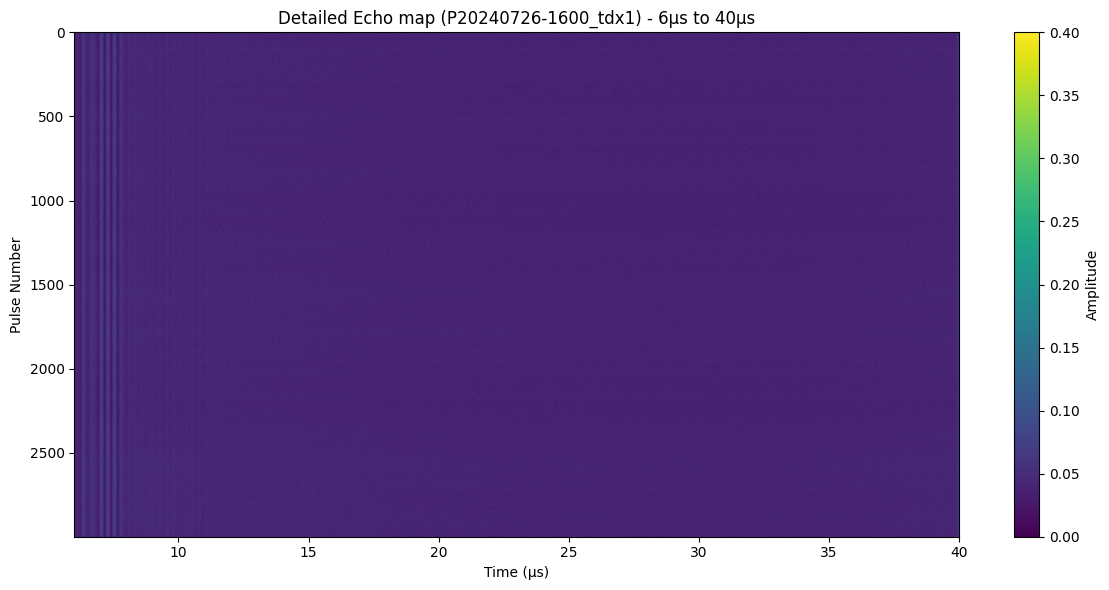

In [5]:
def generate_detailed_image_from_npy(npy_file_path, time_start=6, time_end=40, amplitude_max=0.4, output_dir=None):
    """
    .npyファイルから保存されたエコーマップデータを読み込み、指定した時間範囲と振幅範囲で詳細な画像を生成する関数
    
    Parameters:
    -----------
    npy_file_path : str
        .npyファイルのパス
    time_start : float
        表示する時間範囲の開始点 (μs)
    time_end : float
        表示する時間範囲の終了点 (μs)
    amplitude_max : float
        表示する振幅の最大値 (0〜1の範囲内)
    output_dir : str
        出力画像を保存するディレクトリ、Noneの場合は保存せずに表示のみ
        
    Returns:
    --------
    None
    """
    # .npyファイルを読み込む
    print(f"詳細表示用データを読み込んでいます: {npy_file_path}")
    try:
        data = np.load(npy_file_path, allow_pickle=True).item()
        
        # データを取り出す
        hilbert_matrix_trimmed = data['hilbert_matrix']
        adjusted_time_us_trimmed = data['time_axis']
        n_pulses = data['n_pulses']
        
        print(f"データ読み込み成功: パルス数 {n_pulses}")
        
        # 指定された時間範囲のインデックスを見つける
        if len(adjusted_time_us_trimmed) > 0:
            time_start_idx = np.argmin(np.abs(adjusted_time_us_trimmed - time_start))
            time_end_idx = np.argmin(np.abs(adjusted_time_us_trimmed - time_end))
            
            # 指定された時間範囲のデータを抽出
            time_slice = adjusted_time_us_trimmed[time_start_idx:time_end_idx+1]
            data_slice = hilbert_matrix_trimmed[:, time_start_idx:time_end_idx+1]
            
            # プロットを作成
            plt.figure(figsize=(12, 6))
            plt.imshow(data_slice, aspect='auto', cmap='viridis', 
                    extent=[time_start, time_end, n_pulses-0.5, -0.5],
                    vmin=0, vmax=amplitude_max)
            
            plt.colorbar(label='Amplitude')
            plt.xlabel('Time (μs)')
            plt.ylabel('Pulse Number')
            
            # 入力ファイル名から出力ファイル名を生成
            base_filename = os.path.basename(npy_file_path)
            base_name = os.path.splitext(base_filename)[0]
            plt.title(f'Detailed Echo map ({base_name}) - {time_start}μs to {time_end}μs')
            plt.tight_layout()
            
            # 画像を保存する
            if output_dir is not None:
                # 出力ディレクトリが存在しない場合は作成
                os.makedirs(output_dir, exist_ok=True)
                
                # 出力ファイル名を生成
                output_filename = f"{base_name}_detail_{time_start}-{time_end}us.png"
                output_path = os.path.join(output_dir, output_filename)
                
                # 画像を保存
                plt.savefig(output_path)
                print(f"詳細画像を保存しました: {output_path}")
            
            plt.show()
        else:
            print("警告: 時間軸データが空です。詳細プロットを作成できません。")
        
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None

# 詳細表示の例
generate_detailed_image_from_npy(npy_file, time_start=6, time_end=40, amplitude_max=0.4, output_dir=output_dir)


Loading data: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.npy
Data loading successful: Number of pulses 3000
Image saved: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.png


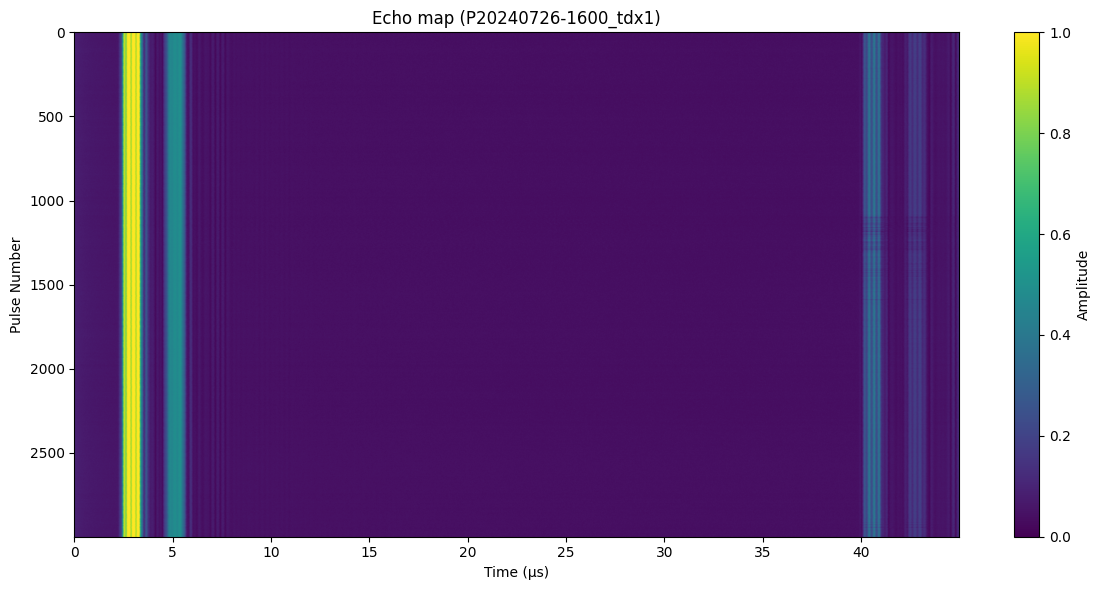

In [ ]:
from src import generate_image_from_npy,generate_detailed_image_from_npy
example_file = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp\\P20240726-1600_tdx1.npy"
example_output = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"

# 使用するファイルパスと出力ディレクトリを直接指定
npy_file = example_file
output_dir = example_output

# 関数を呼び出して画像を生成・表示
generate_detailed_image_from_npy(npy_file, output_dir)